# Flight Data Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-dark-palette')
from glob import glob
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

/Users/alejandrohernandez/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!ls -Gflash | grep parquet

 440976 -rw-rw-r--@  1 alejandrohernandez  staff   215M Oct  7  2022 Combined_Flights_2018.parquet
 602880 -rw-rw-r--@  1 alejandrohernandez  staff   294M Oct  7  2022 Combined_Flights_2019.parquet
 292288 -rw-rw-r--@  1 alejandrohernandez  staff   143M Oct  7  2022 Combined_Flights_2022.parquet
 357688 -rw-rw-r--@  1 alejandrohernandez  staff   175M Oct  7  2022 Combined_Flights_2020.parquet
 474616 -rw-rw-r--@  1 alejandrohernandez  staff   232M Oct  7  2022 Combined_Flights_2021.parquet


## Read & convert 

In [3]:
parquet_files = glob("*.parquet")

In [4]:
column_subset = [
    "FlightDate",
    "Airline",
    "Flight_Number_Marketing_Airline",
    "Origin",
    "Dest",
    "Cancelled",
    "Diverted",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
]

dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f,columns = column_subset))
df = pd.concat(dfs).reset_index(drop = True)

cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype('category')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 21 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Airline                          category      
 2   Flight_Number_Marketing_Airline  int64         
 3   Origin                           category      
 4   Dest                             category      
 5   Cancelled                        bool          
 6   Diverted                         bool          
 7   CRSDepTime                       int64         
 8   DepTime                          float64       
 9   DepDelayMinutes                  float64       
 10  OriginAirportID                  int64         
 11  OriginCityName                   object        
 12  OriginStateName                  category      
 13  DestAirportID                    int64         
 14  DestCityName                    

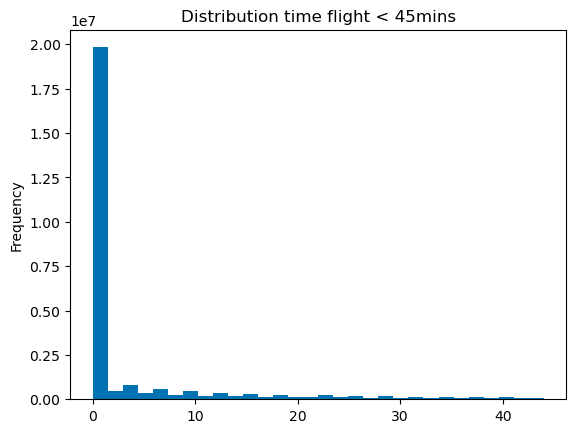

In [6]:
df.query("DepDelayMinutes < 45")["DepDelayMinutes"].plot(kind = "hist",bins = 30, title = "Distribution time flight < 45mins")
plt.show()

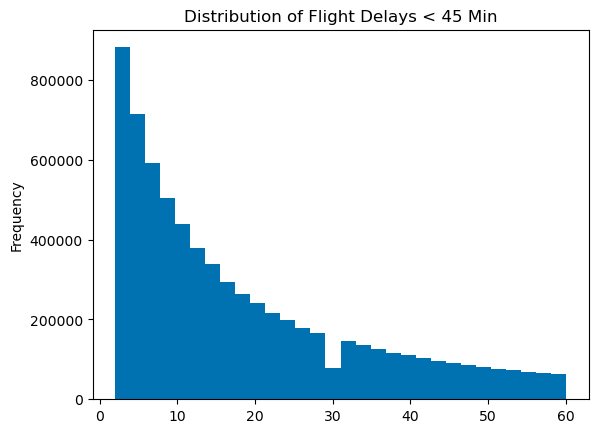

In [7]:
df.query("DepDelayMinutes > 1 and DepDelayMinutes < 61")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 45 Min"
)
plt.show()

In [8]:
df["DepDelayMinutes"]

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
            ... 
29193777     6.0
29193778     0.0
29193779     0.0
29193780     0.0
29193781    23.0
Name: DepDelayMinutes, Length: 29193782, dtype: float64

# Grouping of Delays

In [9]:
df["DelayGroup"] = None
df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"
df.loc[
    (df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <=15), "DelayGroup"] = "Small_Delay"

df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <=45), "DelayGroup"] = "Medium_Delay"

df.loc[df["DepDelayMinutes"] > 45 , "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

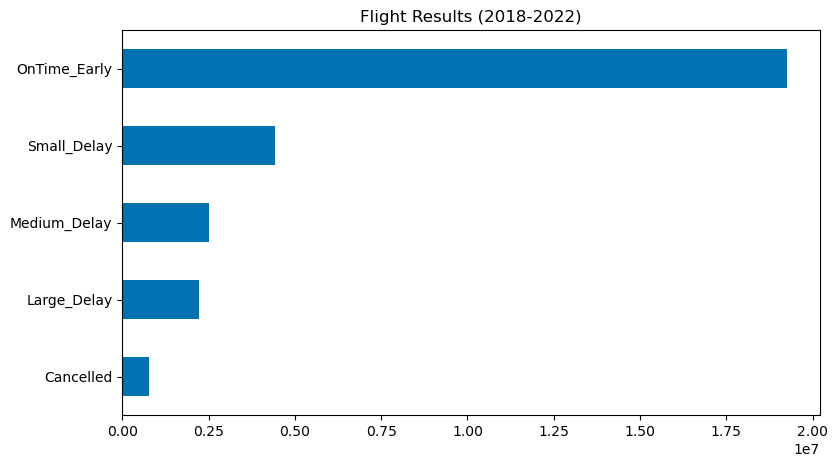

In [10]:
df["DelayGroup"].value_counts(ascending = True).plot(
    kind="barh",figsize=(9,5),title="Flight Results (2018-2022)"
)
plt.show()

# How Many Flights per Year

<function matplotlib.pyplot.show(close=None, block=None)>

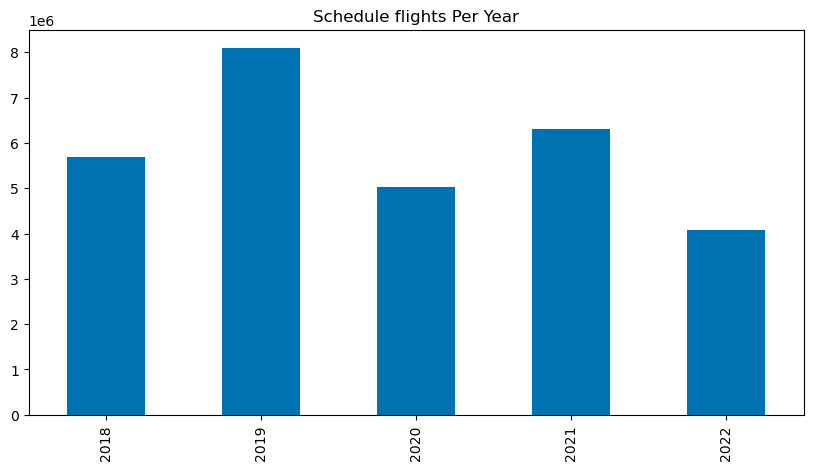

In [11]:
df["Year"] = df["FlightDate"].dt.year
df["Year"].value_counts().sort_index().plot(
    kind = "bar",figsize=(10,5),title = "Schedule flights Per Year" )
plt.show


# What is the porcentaje of fight result per year 

In [12]:
df["Year"] = df["FlightDate"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100  ## NORMALIZE = TRUE " DOES THE PORCENTAJE OF THE TOTAL " 
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,64.115615,16.474583,9.538448,8.317789,1.553565
2019,64.619787,15.716778,9.081583,8.683248,1.898604
2020,76.052291,9.653418,4.572319,3.727722,5.994249
2021,65.698142,16.145308,8.917879,7.479795,1.758876
2022,58.801153,17.706368,10.926539,9.545283,3.020657


In [73]:
pip install calmap plotly_calplot -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.10.4 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [15]:
events = df.groupby("FlightDate")["Cancelled"].mean()

<AxesSubplot:ylabel='Frequency'>

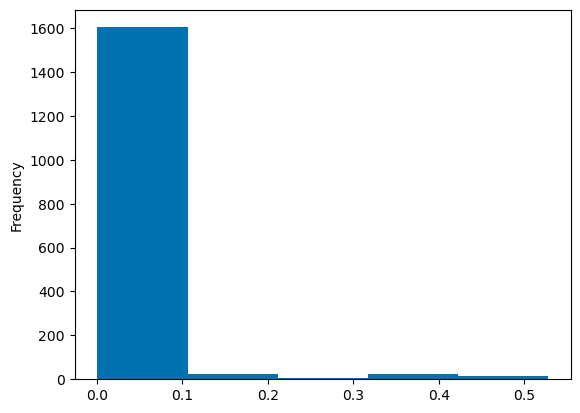

In [17]:
events.plot(kind="hist",bins=5) #big outliers

<AxesSubplot:ylabel='Frequency'>

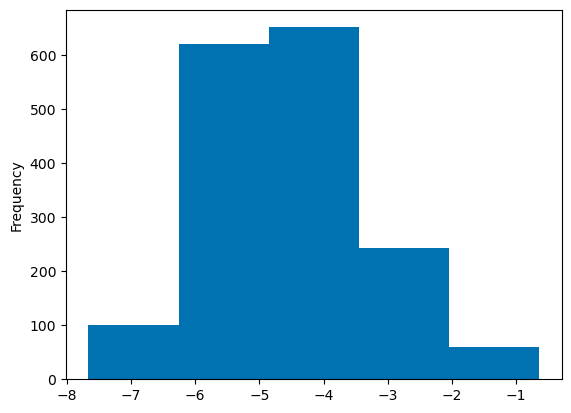

In [18]:
events.apply(np.log).plot(kind="hist",bins=5) #makes it more normal distribution

Text(0.5, 0.92, 'US Flight Cancellations')

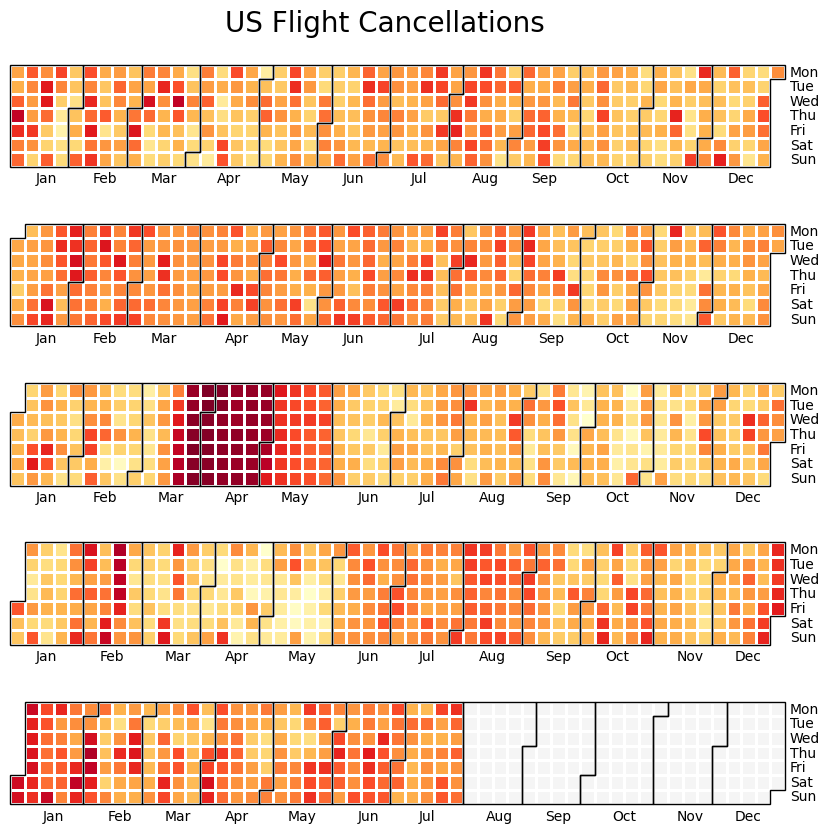

In [21]:
import calmap
events = df.groupby("FlightDate")["Cancelled"].mean()
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    calmap.yearplot(
        events.apply(np.log), year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

# Compare Airline

In [22]:
##Number of Flights 

Text(0.5, 0, 'flghts (100k)')

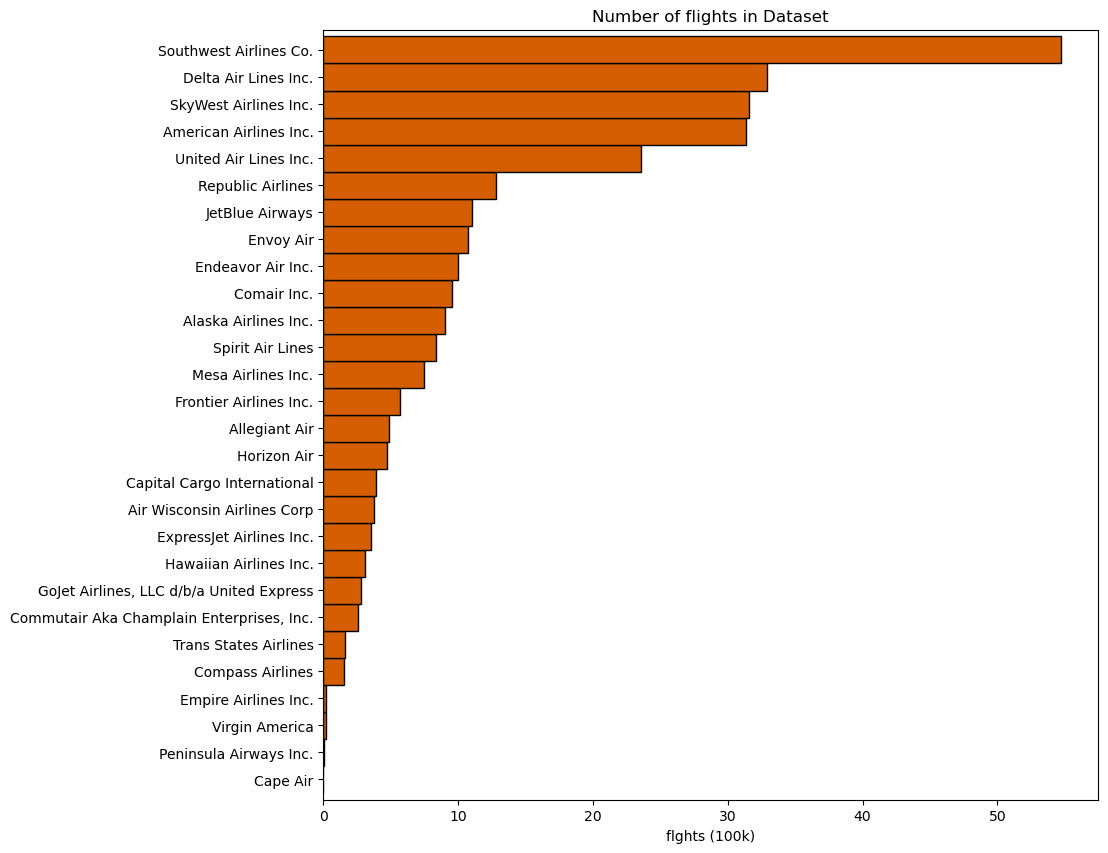

In [24]:
fig, ax = plt.subplots(figsize=(10 , 10))
airline_ordered = (df["Airline"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)
ax.set_title("Number of flights in Dataset")
ax.set_xlabel("flghts (100k)")
                       

# Top Airlines


In [29]:
top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 1_000_000")["index"]
    .values.tolist()
)
df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [30]:
df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

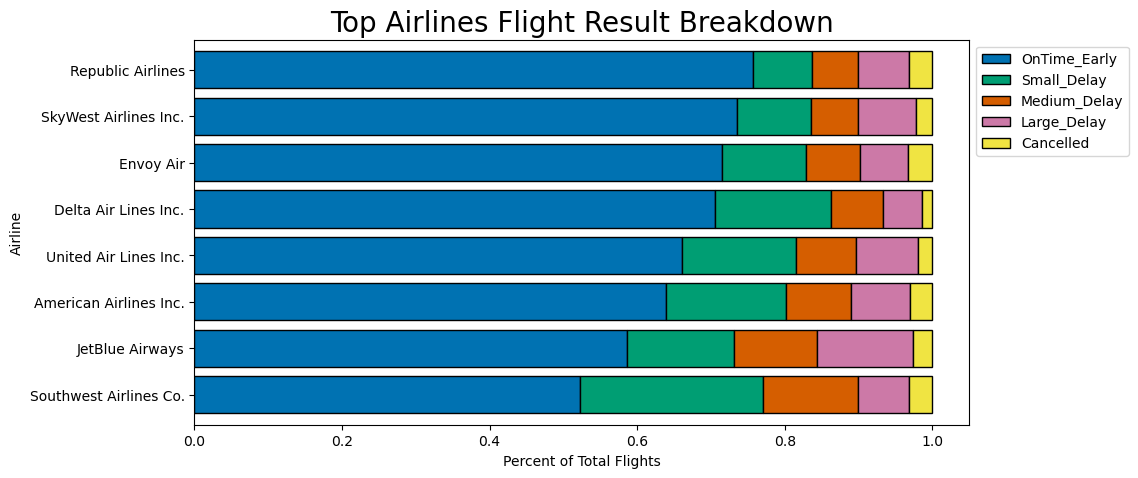

In [37]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]


df_agg = ( 
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked = True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()